In [2]:
import os

# 设置环境变量来指定使用的GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"  # 仅使用0号GPU

import jax

# 确认JAX看到的设备
print(jax.devices())

[CudaDevice(id=0)]


In [3]:
import numpy as np # type: ignore
import dill as pickle
# 文件路径
output_path = 'lcy/sbtm-levy/experiments/result/example3/lr=0.0001_nf=0.01_tf=1.npy'
# 使用 with 语句打开并读取文件
with open(output_path, 'rb') as file:
    data = pickle.load(file)

# 检查数据类型
print("Data Type:", type(data))

# 如果是字典类型，打印键和相关信息
if isinstance(data, dict):
    print("Data contains these keys:", data.keys())
    # for key, value in data.items():
    #     print(f"Key: {key}, Type of Value: {type(value)}, Size/Length: {len(value) if hasattr(value, '__len__') else 'Not Applicable'}")

# 如果是列表类型，打印列表长度和前几个元素的类型
elif isinstance(data, list):
    print("Length of List:", len(data))
    print("Types of first few elements:", [type(elem) for elem in data[:5]])

# 如果是其他类型，尽可能提供详细信息
else:
    print("Detailed View:", data)

# 检查 'all_samples' 键的值
if 'all_samples' in data:
    all_samples = data['all_samples']
    print("Data Type of 'all_samples':", type(all_samples))
    
print("Keys in 'all_samples':", all_samples.keys())

# 访问 'SDE' 并打印相关信息
sde_samples = all_samples['SDE']
print("Type of 'SDE':", type(sde_samples))

# 检查数据大小
if hasattr(sde_samples, 'shape'):
    print("Shape of 'SDE':", sde_samples.shape)
elif hasattr(sde_samples, '__len__'):
    print("Length of 'SDE':", len(sde_samples))
else:
    print("'SDE' does not have a length or shape property.")

# 访问 'learned' 并打印相关信息
learned_samples = all_samples['learned']

print("Type of 'learned':", type(learned_samples))

# 检查数据大小
if hasattr(learned_samples, 'shape'):
    print("Shape of 'learned':", learned_samples.shape)
elif hasattr(learned_samples, '__len__'):
    print("Length of 'learned':", len(learned_samples))
else:
    print("'learned' does not have a length or shape property.")

# 检查 'SDE' 列表中前几个元素的类型和属性
if len(sde_samples) > 0:
    print("Type of first element in 'SDE':", type(sde_samples[0]))
    if hasattr(sde_samples[0], 'shape'):
        print("Shape of first element:", sde_samples[0].shape)
    elif hasattr(sde_samples[0], '__len__'):
        print("Length of first element:", len(sde_samples[0]))
else:
    print("'SDE' list is empty.")


learned_samples_np = [np.array(sample) for sample in learned_samples]

Data Type: <class 'dict'>
Data contains these keys: dict_keys(['n_max_init_opt_steps', 'init_learning_rate', 'init_ltol', 'sig0', 'mu0', 'drift', 'force_args', 'amp', 'freq', 'dt', 'D', 'D_sqrt', 'n', 'd', 'N', 'ltol', 'gtol', 'n_opt_steps', 'learning_rate', 'n_hidden', 'n_neurons', 'act', 'residual_blocks', 'interacting_particle_system', 'key', 'params_list', 'all_samples', 'output_folder', 'output_name', 'n_time_steps', 'use_SDE', 'use_ODE', 'save_fac', 'store_fac', 'means', 'covs', 'entropies', 'mask', 'noise_fac', 'score_network', 'potential_network', 'opt', 'opt_state', 'batch_score', 'forcing', 'loss_func', 'n_train_samples', 'step_learned', 'step_SDE'])
Data Type of 'all_samples': <class 'dict'>
Keys in 'all_samples': dict_keys(['SDE', 'learned'])
Type of 'SDE': <class 'list'>
Length of 'SDE': 201
Type of 'learned': <class 'list'>
Length of 'learned': 201
Type of first element in 'SDE': <class 'jaxlib.xla_extension.ArrayImpl'>
Shape of first element: (4000, 3)


In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio.v2 as imageio
# from IPython.display import Image, display
# from io import BytesIO
# import seaborn as sns  # 确保导入 seaborn

# # 将 JAX 数组转换为 NumPy 数组
# all_samples_np = [np.array(sample) for sample in sde_samples]
# learned_samples_np = [np.array(sample) for sample in learned_samples]

N = len(learned_samples)
# N = 51
# # 只选择前8个样本创建 GIF
# selected_sde_samples = all_samples_np[:N]
# selected_learned_samples = learned_samples_np[:N]

# # 创建一个内存中的虚拟文件 (使用 BytesIO)
# gif_io = BytesIO()

# with imageio.get_writer(gif_io, format='gif', mode='I', duration=100) as writer:
#     for index, (sde_sample, learned_sample) in enumerate(zip(selected_sde_samples, selected_learned_samples)):
#         # 创建图形并捕获为 PNG
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 创建两个子图
        
#         # # 绘制第一个样本
#         # sns.kdeplot(sde_sample.squeeze(), fill=True, ax=ax1)
#         # ax1.set_xlim(-2, 8)
#         # ax1.set_ylim(0, 1)
#         # ax1.set(title=f'SDE Sample Frame: {index + 1}', xlabel='Dimension 1', ylabel='Density')
#         # ax1.grid(True)
        
#         # 绘制第二个样本
#         sns.kdeplot(learned_sample.squeeze(), fill=True, ax=ax2)
#         ax2.set_xlim(-2, 8)
#         ax2.set_ylim(0, 1)
#         ax2.set(title=f'Learned Sample Frame: {index + 1}', xlabel='Dimension 1', ylabel='Density')
#         ax2.grid(True)
        
#         # 保存到 BytesIO 对象
#         buf = BytesIO()
#         plt.savefig(buf, format='png')
#         plt.close(fig)
#         buf.seek(0)
        
#         # 读取 PNG 图像数据并添加到 GIF
#         image = imageio.imread(buf)
#         writer.append_data(image)

# # 重置 GIF BytesIO 的文件指针
# gif_io.seek(0)

# # 显示 GIF
# display(Image(data=gif_io.read(), format='gif'))

In [5]:
import numpy as np
from scipy.stats import levy_stable 
########################################################
D = 2
# N = 51
# Parameters (r, δ, Kv, km, αm, σv, σm, ρ)
gamma = 0.04
delta = 0.015
kappa_v = 3.1206
kappa_m = 3.3168
alpha_m = 0.1125
sigma_v = 0.394
sigma_m = 0.0835
rho = -0.688

# Additional parameters (λ0, λ1, λ2)
lambda0 = 2.096
lambda1 = 21.225
lambda2 = 0

# Parameters (μJ, σJ, μJV)
mu_J = -0.012
sigma_J = 0.043
mu_J_V = 0.002
Jbar = np.exp (mu_J + sigma_J**2/2) -1
########################################################


# 参数初始化
dt = 1e-3  # 时间步长
num_steps = (N-1)*5 + 1  # 时间步数
num_samples = 40000  # 样本数量

# 创建初始样本
x0 = np.random.normal(1, 0.1, (num_samples, 3))
print(x0.shape)
# 初始化样本数组，只保存每25步的数据
step_save = 5
saved_steps = num_steps // step_save + 1
sdeLevy = np.zeros((num_samples, saved_steps, 3))

# # 模拟每个样本路径
# for i in range(num_samples):
#     s = x0[i,0]
#     v = x0[i,1]
#     m = x0[i,2]
#     save_index = 0
#     for t in range(num_steps):
#         if t % step_save == 0:
#             sdeLevy[i, save_index] = [s,v,m]
#             save_index += 1
        
#         dW = np.random.normal(0, 1, size=3) * np.sqrt(dt)
#         LAMBDA = lambda0 + lambda1 * np.abs(v) + lambda2 * np.abs(m)
#         NN = np.random.poisson(LAMBDA * dt)
#         # print(NN)
#         Y1 = np.random.normal(loc = mu_J, scale=sigma_J, size = NN)
#         Y2 = np.random.exponential(scale=mu_J_V, size=NN)

#         s += (gamma - delta - v/2 - LAMBDA*Jbar) * dt + np.sqrt(np.abs(v)) * dW[0] 
#         v += (kappa_v*(m - v)) * dt + sigma_v * np.sqrt(np.abs(v))* (dW[0] + np.sqrt(1-rho**2) *  dW[1]) 
#         m += (kappa_m *(alpha_m - m)) * dt + sigma_m * np.sqrt(np.abs(m)) * dW[2] 

(40000, 3)


In [6]:
sdeLevy.shape


(40000, 201, 3)

In [7]:
x0 = np.random.normal(5, 1, (num_samples, 3))

# 预先计算所有随机变量
dWs = np.random.normal(0, 1, (num_samples, num_steps, 3)) * np.sqrt(dt)
NNs = np.zeros((num_samples, num_steps), dtype=int)

# 遍历每一时间步
for t in range(num_steps):
    if t % step_save == 0:
        sdeLevy[:, t // step_save, :] = x0
    
    LAMBDA = lambda0 + lambda1 * np.abs(x0[:, 1]) + lambda2 * np.abs(x0[:, 2])
    NNs[:, t] = np.random.poisson(LAMBDA * dt)
    
    dL1 = np.zeros(num_samples)
    dL2 = np.zeros(num_samples)
    for i in range(num_samples):
        if NNs[i, t] > 0:
            Y1 = np.random.normal(mu_J, sigma_J, NNs[i, t])
            Y2 = np.random.exponential(mu_J_V, NNs[i, t])
            dL1[i] = Y1.sum()
            dL2[i] = Y2.sum()
    
    x0[:, 0] += (gamma - delta - x0[:, 1]/2 - LAMBDA * Jbar) * dt + np.sqrt(np.abs(x0[:, 1])) * dWs[:, t, 0] 
    x0[:, 1] += (kappa_v * (x0[:, 2] - x0[:, 1])) * dt + sigma_v * np.sqrt(np.abs(x0[:, 1])) * (dWs[:, t, 0] + np.sqrt(1 - rho**2) * dWs[:, t, 1]) 
    x0[:, 2] += (kappa_m * (alpha_m - x0[:, 2])) * dt + sigma_m * np.sqrt(np.abs(x0[:, 2])) * dWs[:, t, 2]

# 最终步骤的保存
sdeLevy[:, -1, :] = x0

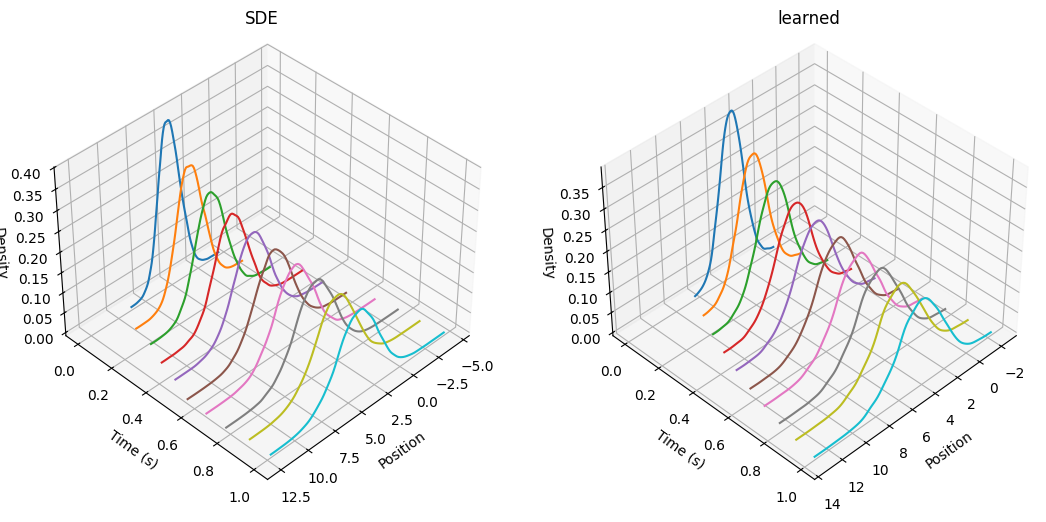

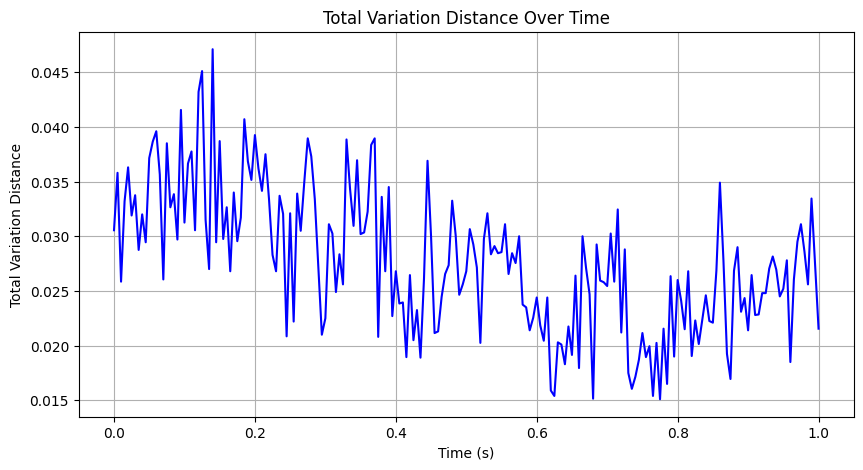

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

def estimate_density(data_slice):
    kde = gaussian_kde(data_slice)
    x_range = np.linspace(data_slice.min(), data_slice.max(), 100)
    density = kde(x_range)
    return x_range, density

def calculate_histogram(data, bins):
    hist, _ = np.histogram(data, bins=bins, density=True)
    hist = hist / hist.sum()
    return hist

def total_variation(hist1, hist2):
    # 计算两个直方图之间的 Total Variation 距离
    # print(hist1.sum(),hist2.sum())
    return np.sum(np.abs(hist1 - hist2)) 

fig = plt.figure(figsize=(20, 6))
time_indices = np.linspace(0, 200, 10, dtype=int)

# 第一子图
ax1 = fig.add_subplot(131, projection='3d')
for t in time_indices:
    x, density = estimate_density(sdeLevy[:, t, 0])
    ax1.plot(x, density, zs=t*0.005, zdir='y')
ax1.set_title('SDE')
ax1.set_xlabel('Position')
ax1.set_ylabel('Time (s)')
ax1.set_zlabel('Density')
ax1.view_init(elev=40, azim=45)

# 第二子图
ax2 = fig.add_subplot(132, projection='3d')
for t in time_indices:
    x, density = estimate_density(learned_samples_np[t][:,0].squeeze())
    ax2.plot(x, density, zs=t*0.005, zdir='y')
ax2.set_title('learned')
ax2.set_xlabel('Position')
ax2.set_ylabel('Time (s)')
ax2.set_zlabel('Density')
ax2.view_init(elev=40, azim=45)

# 第三子图
tv_errors = []
time_indices = np.linspace(0, 200, 200, dtype=int)
for t in time_indices:
    bins = np.linspace(min(sdeLevy[:, t, 0].min(), learned_samples_np[t][:,0].min()), 
                       max(sdeLevy[:, t, 0].max(), learned_samples_np[t][:,0].max()), 20)
    hist1 = calculate_histogram(sdeLevy[:, t, 0], bins)
    hist2 = calculate_histogram(learned_samples_np[t][:,0].squeeze(), bins)
    tv_error = total_variation(hist1, hist2)
    tv_errors.append(tv_error)

# 创建折线图
plt.figure(figsize=(10, 5))
plt.plot(time_indices*0.005, tv_errors, linestyle='-', color='b')
plt.title('Total Variation Distance Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Total Variation Distance')
plt.grid(True)
plt.show()

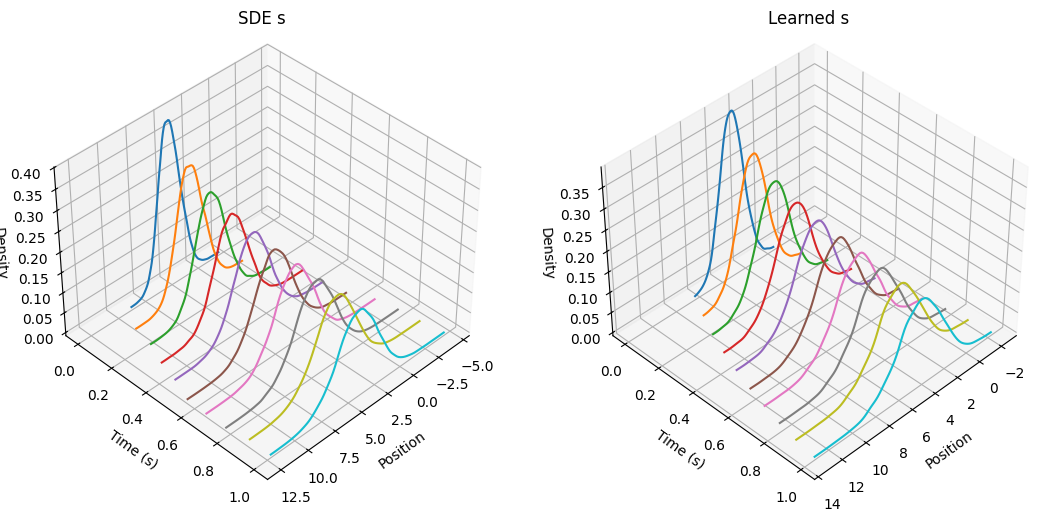

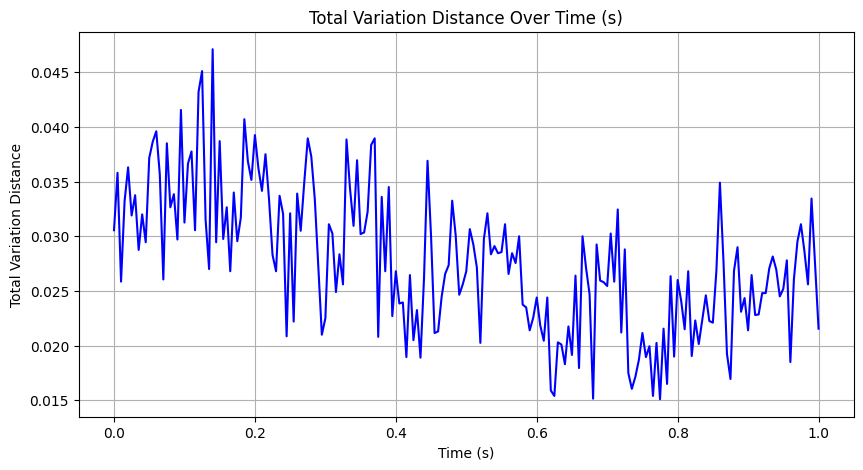

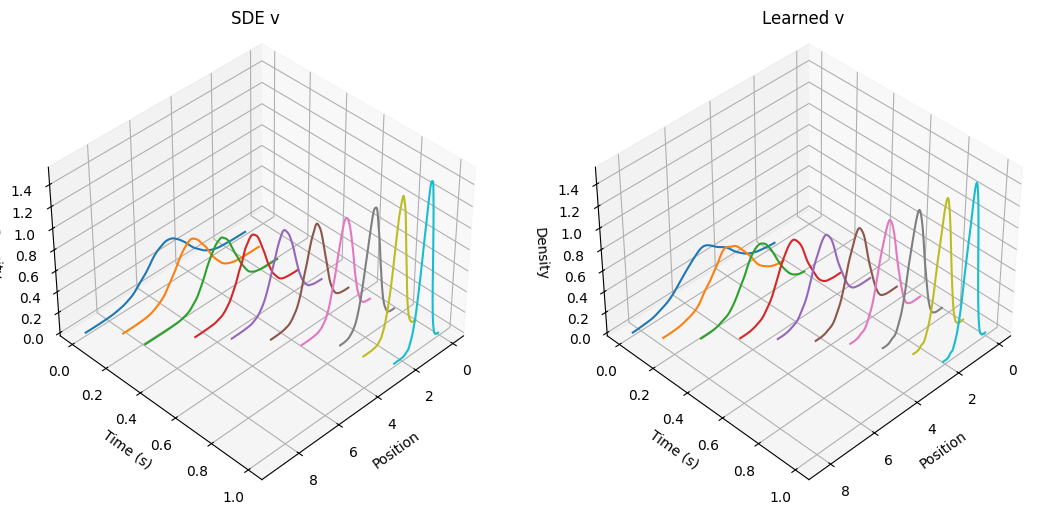

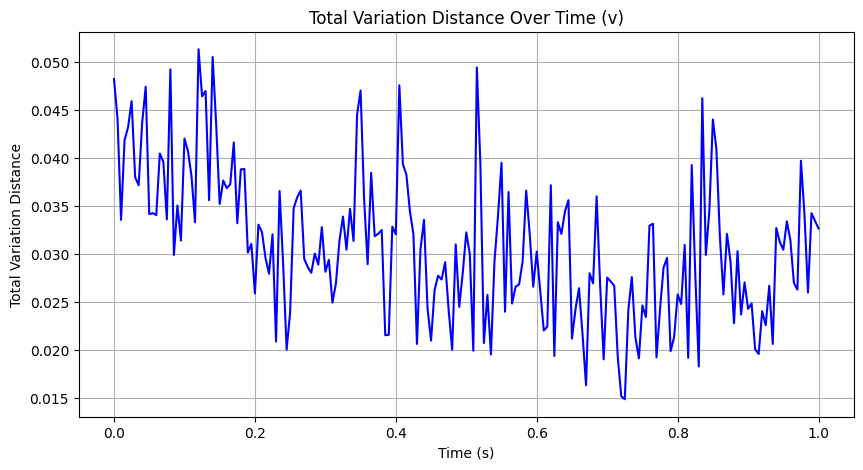

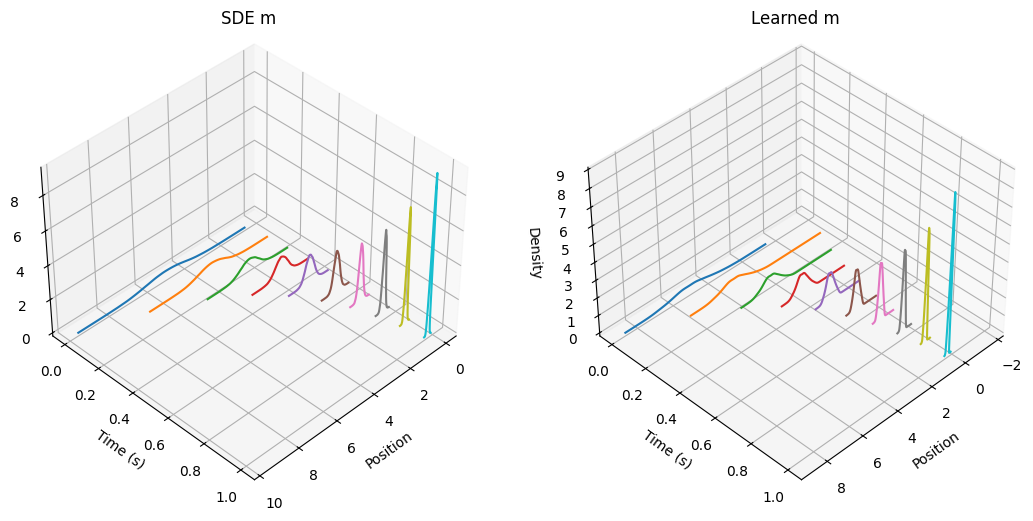

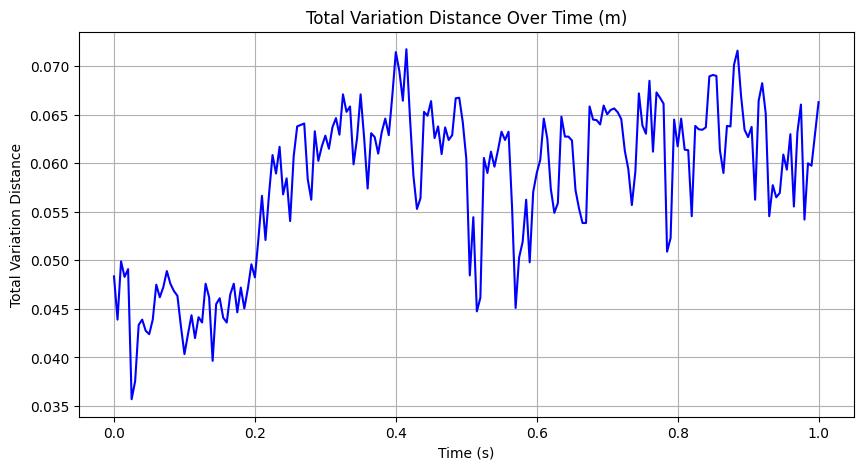

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

def estimate_density(data_slice):
    kde = gaussian_kde(data_slice)
    x_range = np.linspace(data_slice.min(), data_slice.max(), 100)
    density = kde(x_range)
    return x_range, density

def calculate_histogram(data, bins):
    hist, _ = np.histogram(data, bins=bins, density=True)
    hist = hist / hist.sum()  # 确保直方图归一化
    return hist

def total_variation(hist1, hist2):
    return np.sum(np.abs(hist1 - hist2))

features = ['s', 'v', 'm']  # 三个特征
feature_index = {'s': 0, 'v': 1, 'm': 2}  # 特征到索引的映射
# features = ['v']
for feature in features:
    fig = plt.figure(figsize=(20, 6))
    time_indices = np.linspace(0, 200, 10, dtype=int)
    
    # 第一子图：SDE
    ax1 = fig.add_subplot(131, projection='3d')
    for t in time_indices:
        x, density = estimate_density(sdeLevy[:, t, feature_index[feature]])
        ax1.plot(x, density, zs=t*0.005, zdir='y')
    ax1.set_title(f'SDE {feature}')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Time (s)')
    ax1.set_zlabel('Density')
    ax1.view_init(elev=40, azim=45)

    # 第二子图：learned
    ax2 = fig.add_subplot(132, projection='3d')
    for t in time_indices:
        x, density = estimate_density(learned_samples_np[t][:, feature_index[feature]].squeeze())
        ax2.plot(x, density, zs=t*0.005, zdir='y')
    ax2.set_title(f'Learned {feature}')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Time (s)')
    ax2.set_zlabel('Density')
    ax2.view_init(elev=40, azim=45)

    # 第三子图：Total Variation Distance
    tv_errors = []
    time_indices = np.linspace(0, 200, 200, dtype=int)
    for t in time_indices:
        bins = np.linspace(min(sdeLevy[:, t, feature_index[feature]].min(), learned_samples_np[t][:, feature_index[feature]].min()), 
                           max(sdeLevy[:, t, feature_index[feature]].max(), learned_samples_np[t][:, feature_index[feature]].max()), 20)
        hist1 = calculate_histogram(sdeLevy[:, t, feature_index[feature]], bins)
        hist2 = calculate_histogram(learned_samples_np[t][:, feature_index[feature]].squeeze(), bins)
        tv_error = total_variation(hist1, hist2)
        tv_errors.append(tv_error)

    # 创建折线图
    plt.figure(figsize=(10, 5))
    plt.plot(time_indices*0.005, tv_errors, linestyle='-', color='b')
    plt.title(f'Total Variation Distance Over Time ({feature})')
    plt.xlabel('Time (s)')
    plt.ylabel('Total Variation Distance')
    plt.grid(True)
    plt.show()

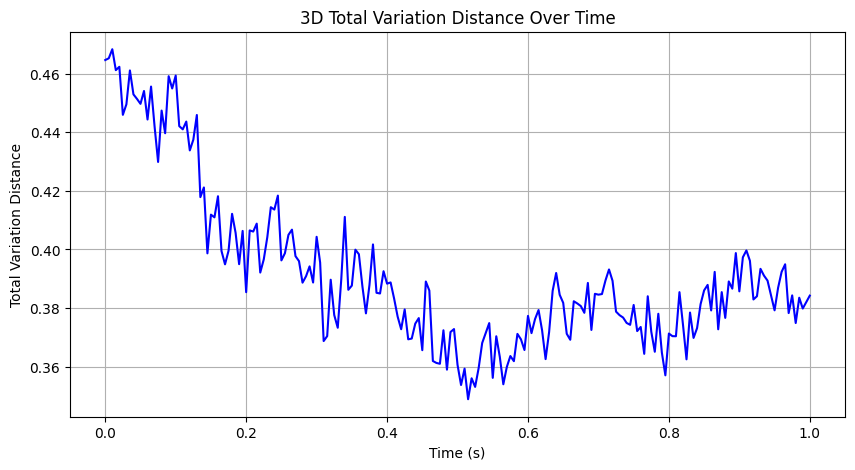

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram_multidimensional(data_slices, bins_per_feature):
    # 根据每个特征的bins计算多维度直方图
    hist, _ = np.histogramdd(data_slices, bins=bins_per_feature, density=True)
    hist = hist / hist.sum()  # 归一化直方图
    return hist

def total_variation_multidimensional(hist1, hist2):
    # 计算多维直方图的总变异距离
    return np.sum(np.abs(hist1 - hist2))

# 特征索引
features = ['s', 'v', 'm']
feature_index = {'s': 0, 'v': 1, 'm': 2}

# 时间点
time_indices = np.linspace(0, 200, 200, dtype=int)
tv_errors = []

for t in time_indices:
    # 对每个时间点计算每个特征的bins
    bins = [np.linspace(sdeLevy[:, t, feature_index[feat]].min(), sdeLevy[:, t, feature_index[feat]].max(), 20) for feat in features]
    
    # 获取每个时间点的多维数据
    data_slices_sde = sdeLevy[:, t, :]
    data_slices_learned = learned_samples_np[t]
    
    # 计算每个时间点的多维直方图
    hist1 = calculate_histogram_multidimensional(data_slices_sde, bins)
    hist2 = calculate_histogram_multidimensional(data_slices_learned, bins)
    
    # 计算TVD
    tv_error = total_variation_multidimensional(hist1, hist2)
    tv_errors.append(tv_error)

# 绘制TVD折线图
plt.figure(figsize=(10, 5))
plt.plot(time_indices * 0.005, tv_errors, linestyle='-', color='b')
plt.title('3D Total Variation Distance Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Total Variation Distance')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

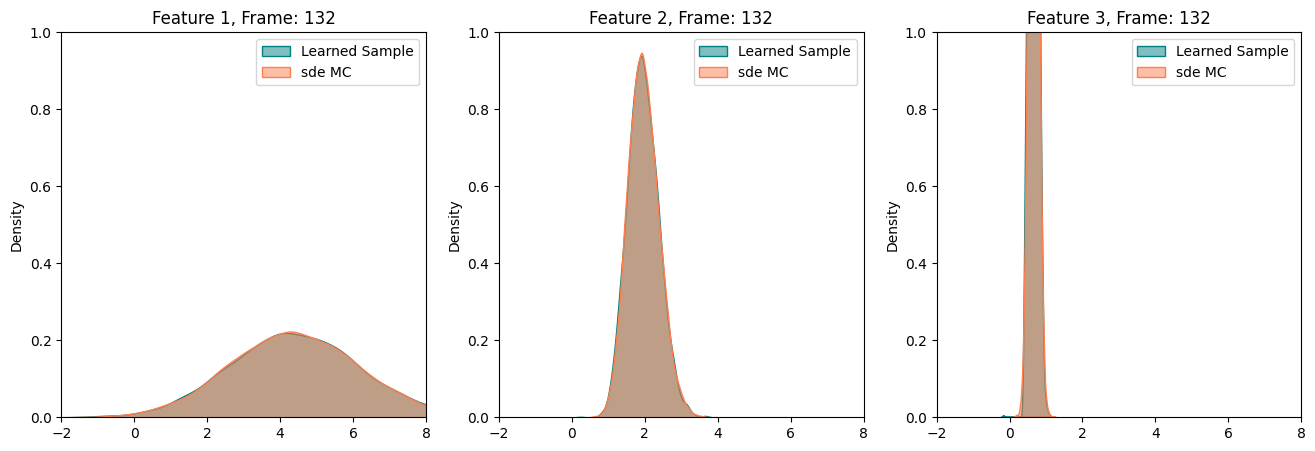

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import Image, display
from io import BytesIO
import seaborn as sns  # 确保导入 seaborn

# 创建一个BytesIO流来保存GIF
gif_io = BytesIO()

# 使用imageio创建GIF写入器
with imageio.get_writer(gif_io, format='gif', mode='I', duration=0.1) as writer:
    for t in range(saved_steps):
        # 创建一个图形和一个3x1网格的子图
        fig, axs = plt.subplots(1, 3, figsize=(16, 5))

        # 遍历每个特征
        for i in range(3):
            # 绘制每个特征的KDE图
            sns.kdeplot(learned_samples_np[t][:,i].squeeze(), fill=True, ax=axs[i], label='Learned Sample', color='#008080', alpha=0.5)  # Teal
            sns.kdeplot(sdeLevy[:, t,  i], fill=True, ax=axs[i], label='sde MC', color='#FF7F50', alpha=0.5)  # Coral
            axs[i].set(title=f'Feature {i+1}, Frame: {t + 1}')
            axs[i].set_xlim(-2, 8)
            axs[i].set_ylim(0, 1)
            axs[i].legend()  # 显示图例

        # 保存到缓冲区
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close(fig)
        buf.seek(0)
        
        # 读取PNG图像数据并添加到GIF
        image = imageio.imread(buf)
        writer.append_data(image)

# 重置GIF BytesIO的文件指针
gif_io.seek(0)

# 在Jupyter Notebook中显示GIF
from IPython.display import Image, display
display(Image(data=gif_io.getvalue(), format='gif'))

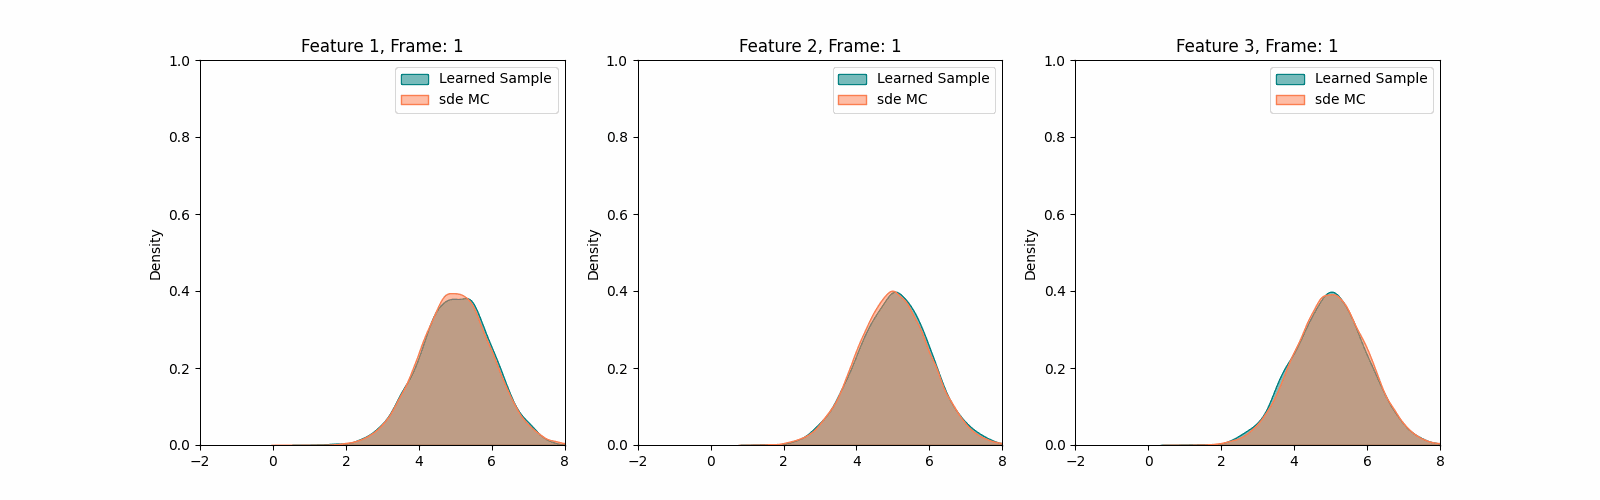

In [145]:
# Reset GIF BytesIO's file pointer
gif_io.seek(0)

# Display the GIF in Jupyter Notebook
display(Image(data=gif_io.read(), format='gif'))